<a href="https://colab.research.google.com/github/thidark/Machine-Learning-Python-/blob/main/3_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving ex3data1.mat to ex3data1.mat
Saving ex3weights.mat to ex3weights.mat


In [6]:
mat=loadmat("/content/ex3data1.mat")

X=mat["X"]
y=mat["y"]

In [7]:
X.shape

(5000, 400)

In [8]:
y.shape

(5000, 1)

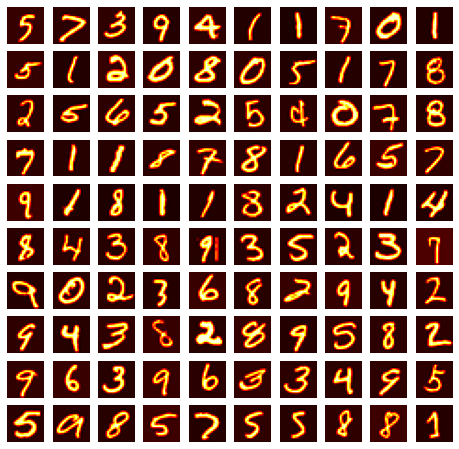

In [11]:
import matplotlib.image as mpimg
fig,axis=plt.subplots(10,10,figsize=(8,8))
for i in range(10):
  for j in range(10):
    axis[i,j].imshow(X[np.random.randint(0,5001),:].reshape(20,20,order="F"),cmap="hot")  #reshape back to 20 pixel by 20 pixel
    axis[i,j].axis("off")

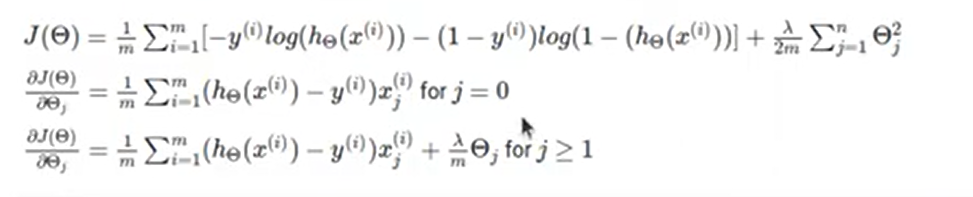

In [13]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [17]:
def lrCostFunction(theta,X,y,Lambda):
  m=len(y)
  z=np.dot(X,theta)
  h=sigmoid(z)
  l=(-y*np.log(h))-((1-y) * np.log(1-h))
  cost=np.sum(l)/m
  reg=(Lambda/(2*m)) * np.dot(theta[1:].transpose(),theta[1:])
  regCost=reg + cost

  j_0=(1/m) * (np.dot(X.transpose(),(h-y)))[0]
  j_1=(1/m) * (np.dot(X.transpose(),(h-y)))[1:] + (Lambda/m) * theta[1:]

  grad = np.vstack((j_0[:np.newaxis],j_1))

  return regCost[0], grad


In [18]:
theta_t=np.array([-2,-1,1,2]).reshape(4,1)
X_t=np.array([np.linspace(0.1,1.5,15)]).reshape(3,5).T
X_t=np.hstack((np.ones((5,1)), X_t))
y_t=np.array([1,0,1,0,1]).reshape(5,1)
J,grad=lrCostFunction(theta_t,X_t,y_t,3)
print("Cost:", J, "Expected Cost: 2.534819")
print("Gradients:\n",grad,"\nExpected gradients:\n 0.146561\n -0.548558\n 0.724722\n 1.398003")


Cost: [2.5348194] Expected Cost: 2.534819
Gradients:
 [[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]] 
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003


In [19]:
def gradientDescent(X,y,theta,alpha,num_iters,Lambda):
  m=len(y)
  J_history=[]

  for i in range(num_iters):
    cost , grad=lrCostFunction(theta,X,y,Lambda)
    theta=theta - (alpha * grad)
    J_history.append(cost)
  
  return theta, J_history

In [27]:
def oneVsAll(X,y,num_labels, Lambda):
  m,n= X.shape[0], X.shape[1]
  intial_theta=np.zeros((n+1,1))
  all_theta=[]
  all_J=[]
  X=np.hstack((np.ones((m,1)),X))

  for i in range(1,num_labels+1):
    theta, J_history=gradientDescent(X,np.where(y==i,1,0), intial_theta,1,300,Lambda)
    all_theta.extend(theta)
    all_J.extend(J_history)
  
  return np.array(all_theta).reshape(num_labels,n+1),all_J

In [28]:
all_theta, all_J=oneVsAll(X,y, 10,0.1)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

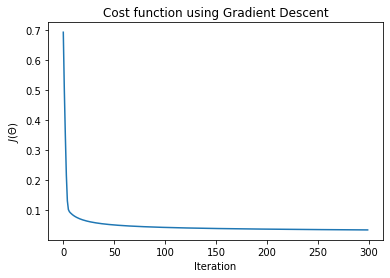

In [29]:
plt.plot(all_J[0:300])
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")